In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister, BasicAer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
def controlled_Z(circuit, control, target):
    circuit.h(target)
    circuit.cx(control, target)
    circuit.h(target)

In [3]:
def phase_oracle(circuit, registers):
    # Call function that implements CZ gate
    controlled_Z(circuit, registers[0], registers[1])

In [4]:
def grover_diffusion(circuit, registers):
    # Apply Hadamard and X gates on all qubits
    circuit.h(registers)
    circuit.x(registers)
    
    #Create a barrier that isolates different sections of the circuit
    circuit.barrier()
    
    # Apply CZ gate with target as quibit 1
    controlled_Z(circuit, registers[0], registers[1])
    
    circuit.barrier()
    circuit.x(registers)
    circuit.h(registers)

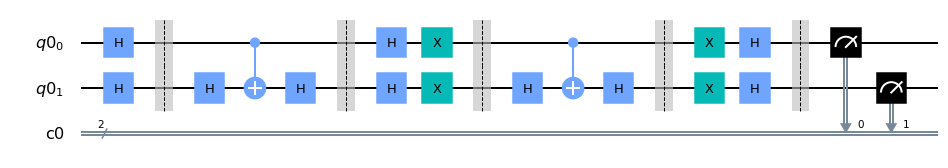

In [5]:
# Define circuit constants
Qubits = 2
tests = 1

# Define register objects
qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit = QuantumCircuit(qr, cr)

# Initialize circuit with Hadamard gates
groverCircuit.h(qr)

# Run phase oracle and diffusion operators
# Can be run multiple times depending on the variable, tests.
for test in range(0,tests):
    groverCircuit.barrier()
    phase_oracle(groverCircuit, qr)
    groverCircuit.barrier()
    grover_diffusion(groverCircuit, qr)
    
# Measure quantum registers
groverCircuit.barrier()
groverCircuit.measure(qr,cr)
# Draw Circuit
groverCircuit.draw(output="mpl")

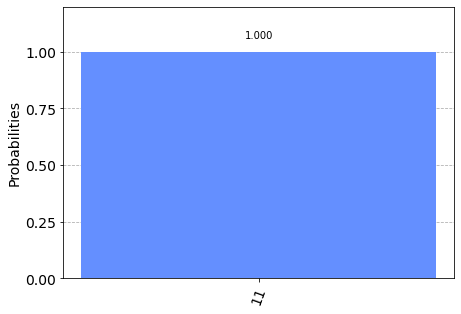

In [6]:
# Define backend that will simualte quantum circuit
backend = BasicAer.get_backend('qasm_simulator')

# Number of times the circuit is ran
shots = 1024

# Execute circuit and plot results on histogram
results = execute(groverCircuit, backend=backend, shots=shots).result()

answer = results.get_counts()
plot_histogram(answer)